In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler

x=np.linspace(start=0,stop=1)
y=-x*np.log2(x)
plt.plot(x,y)
plt.xlabel('P(y)')
plt.ylabel('H(y)')
plt.show()

C:\Users\LIKE\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log2
  import sys
C:\Users\LIKE\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


<Figure size 640x480 with 1 Axes>

C:\Users\LIKE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
C:\Users\LIKE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


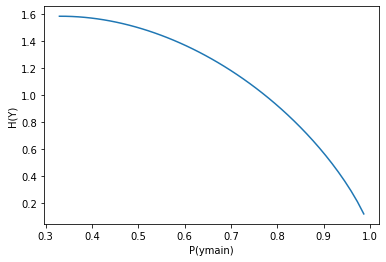

In [2]:
main=np.linspace(start=0.33,stop=1)
Hy=-main*np.log2(main)+-2*(1-main)/2*np.log2((1-main)/2)
plt.plot(main,Hy)
plt.xlabel('P(ymain)')
plt.ylabel('H(Y)')
plt.show()

0.92


Text(0.5, 1.0, 'min_impurity_decrease=0.2')

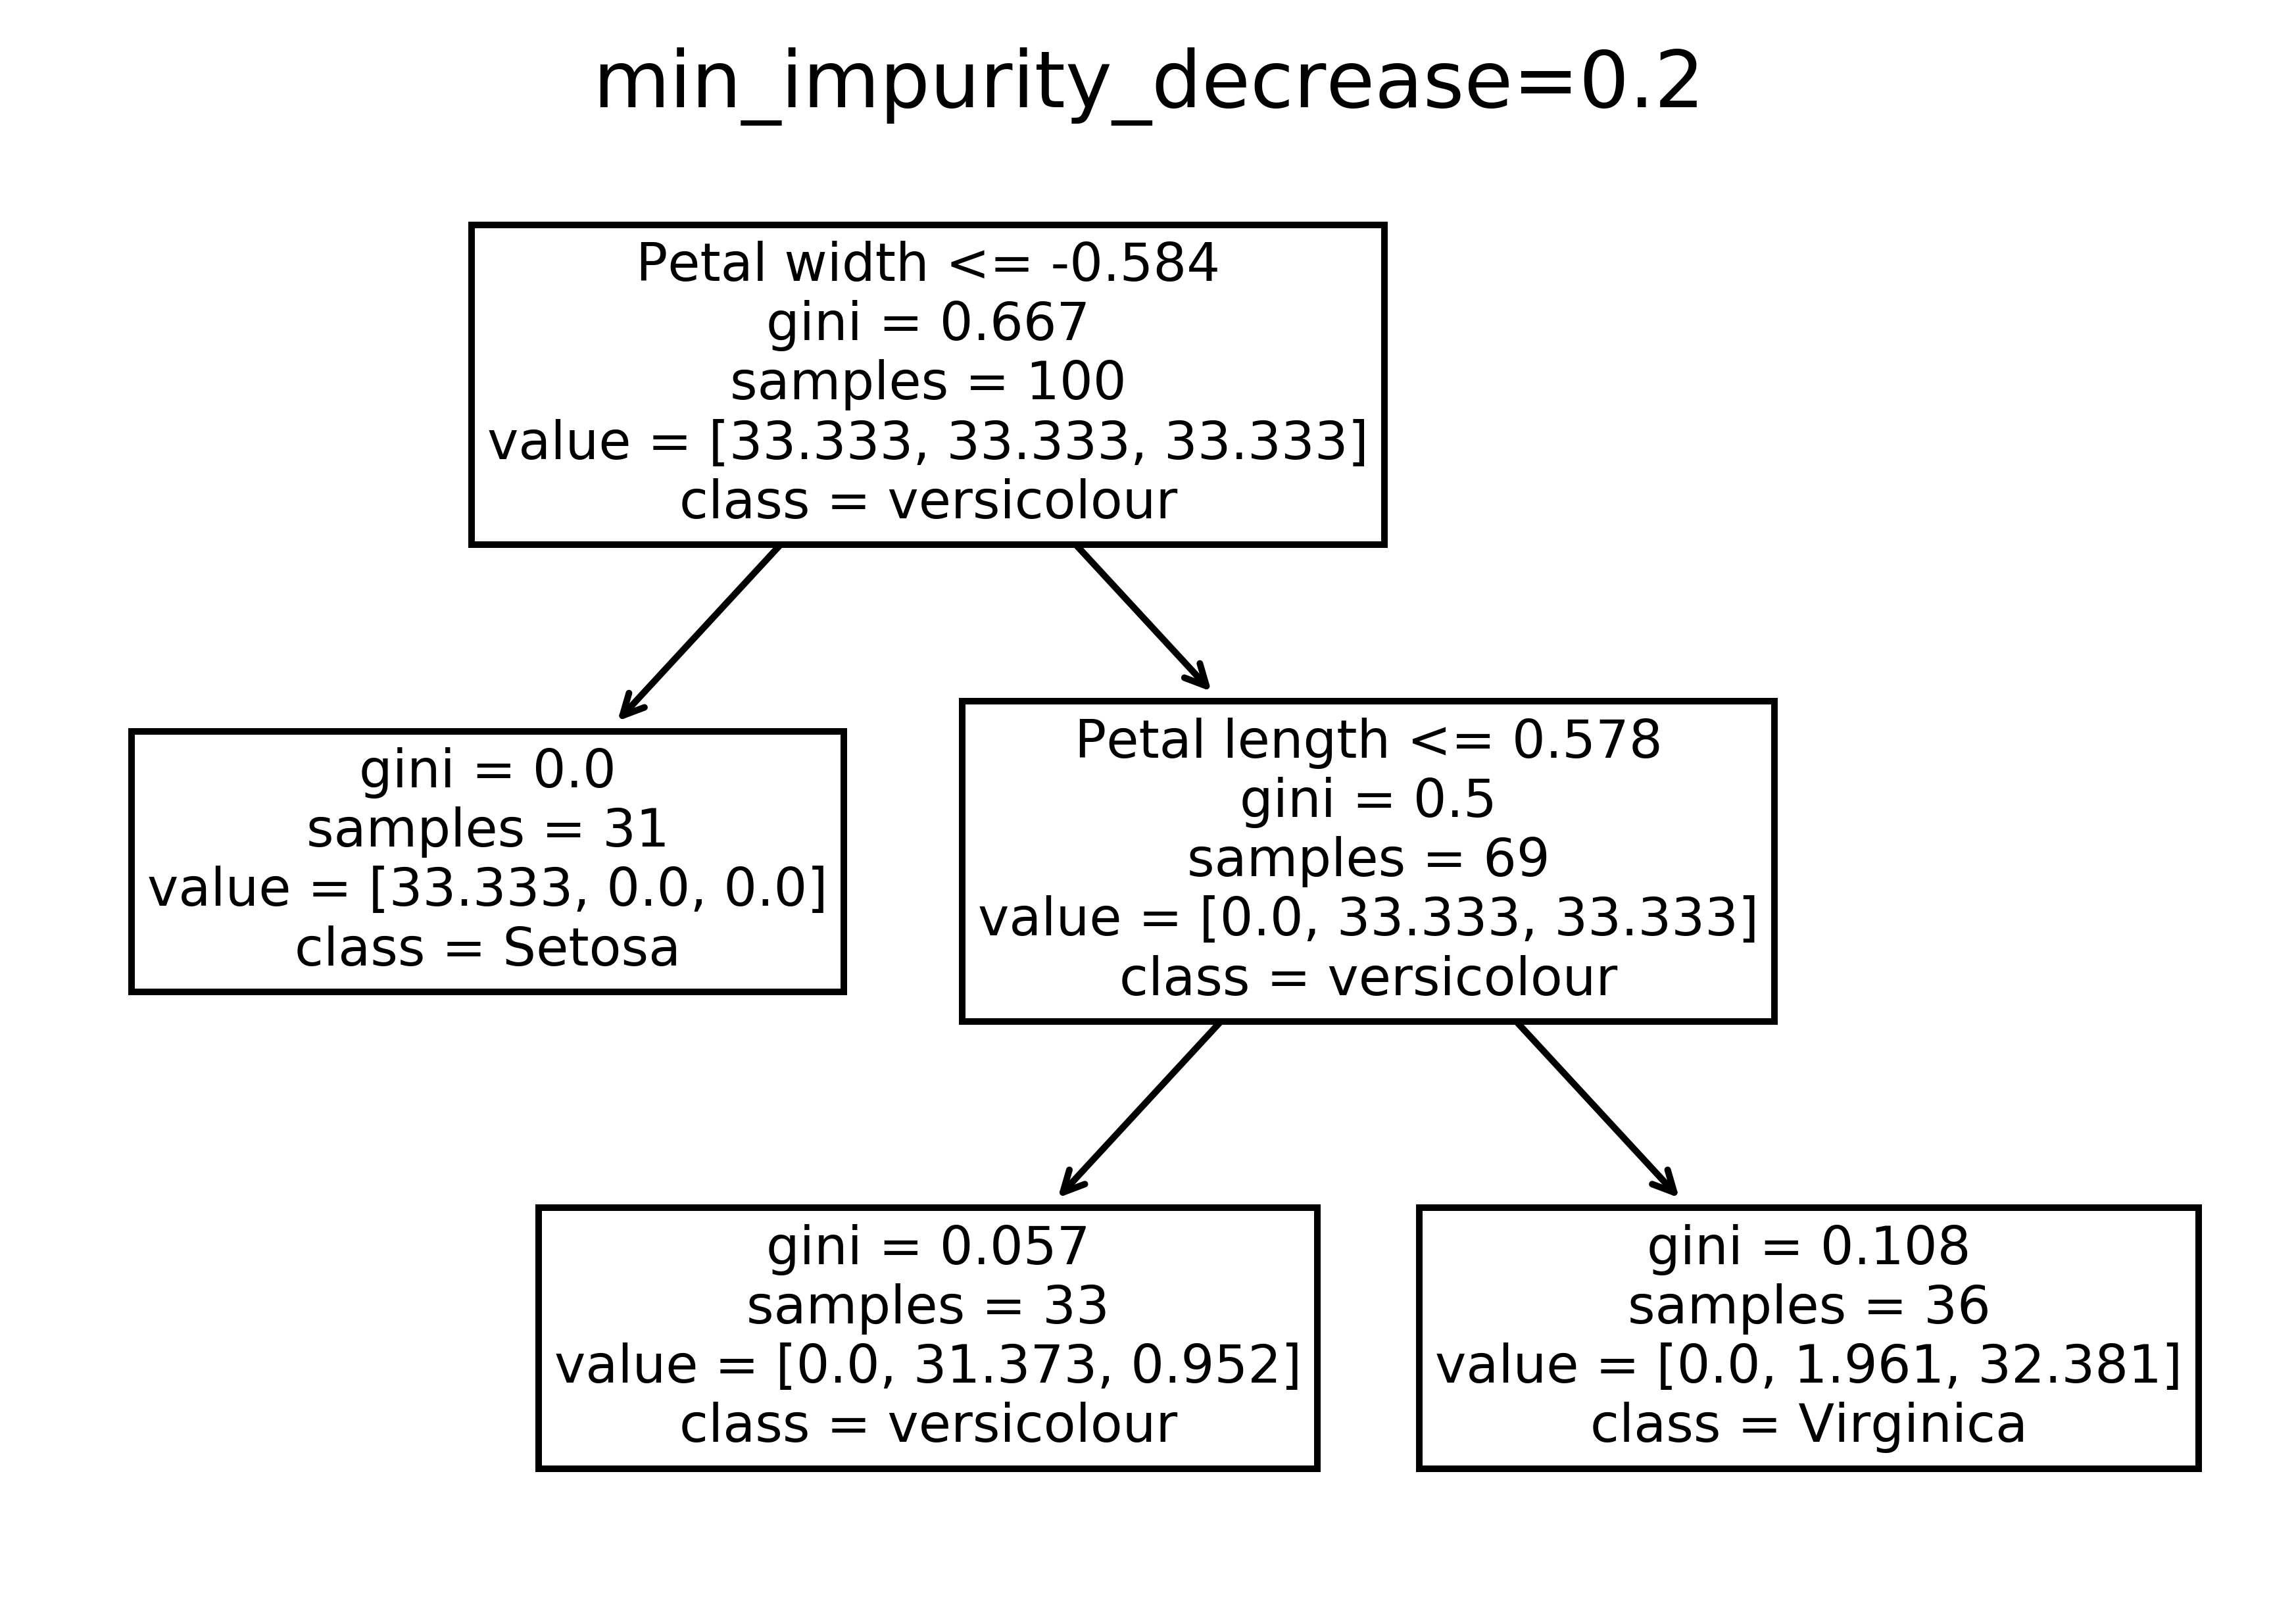

In [3]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from likefunctions import spl_and_Std
x_train,x_test,y_train,y_test=spl_and_Std()
features=['Sepal length','Sepal width','Petal length','Petal width']
classes=['Setosa','versicolour','Virginica']
clf=DecisionTreeClassifier(criterion='gini',splitter='best',class_weight='balanced',min_impurity_decrease=0.2)
clf.fit(x_train,y_train)
print(clf.score(x_test,y_test))
plt.figure(dpi=720)
plot_tree(clf,class_names=classes,feature_names=features,fontsize=8)
plt.title('min_impurity_decrease=0.2')

In [4]:
from likefunctions import tree_full_100_random
result=tree_full_100_random()
result.mean()

0.9463999999999999

In [5]:
from likefunctions import tree_depth_100_random
result_depth2=tree_depth_100_random(max_depth=2)
result_depth3=tree_depth_100_random(max_depth=3)
print(result_depth2.mean())
print(result_depth3.mean())

0.9363999999999999
0.949


In [6]:
from likefunctions import tree_leaf_100_random
result_leaf10=tree_leaf_100_random(min_leaf_samples=10)
result_leaf20=tree_leaf_100_random(min_leaf_samples=20)
print(result_leaf10.mean())
print(result_leaf20.mean())

0.9371999999999998
0.9383999999999998


In [7]:
from likefunctions import tree_impurity_100_random
result_impurity1=tree_impurity_100_random(impurity_decrease=0.1)
result_impurity2=tree_impurity_100_random(impurity_decrease=0.2)
print(result_impurity1.mean())
print(result_impurity2.mean())

0.9364
0.9354


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
data=load_iris()
x=data.data
y=data.target
std=StandardScaler()
std.fit(x)
x=std.transform(x)
clf=RandomForestClassifier(n_estimators=100,oob_score=True)
clf.fit(x,y)
print(clf.oob_score_)

0.94


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
data=load_iris()
x=data.data
y=data.target
std=StandardScaler()
std.fit(x)
x=std.transform(x)
paramlist=[{'n_estimators':range(1,20,1)}]
clf=RandomForestClassifier()
rscRF=GridSearchCV(estimator=clf,param_grid=paramlist,scoring)
y=label_binarize(y,classes=[0,1,2])
rscRF.fit(x,y)
#print(rscRF.grid_scores_)
print(rscRF.best_params_)
print("best accuracy:%f"%rscRF.best_score_)


SyntaxError: positional argument follows keyword argument (<ipython-input-9-1b637d37c1a2>, line 14)

In [ ]:
from likefunctions import randomforest_number_100_random
from matplotlib import pyplot as plt
result=[]
for i in range(50):
    accuracy=randomforest_number_100_random(number=i+1)
    result.append(accuracy.mean())
plt.plot(result)
plt.show()


In [ ]:
from likefunctions import randomforest_feature_100_random
from matplotlib import pyplot as plt
result=[]
for i in range(0,4):
    accuracy=randomforest_feature_100_random(number=i+1)
    result.append(accuracy.mean())
plt.figure(dpi=720)
plt.plot(list(range(1,5)),result)
plt.xlabel('max_feature')
plt.ylabel('accuracy')
plt.show()



In [ ]:
from likefunctions import randomforest_depth_100_random
from matplotlib import pyplot as plt
result=[]
for i in range(2,7):
    accuracy=randomforest_depth_100_random(number=i)
    result.append(accuracy.mean())
plt.figure(dpi=360)
plt.plot(list(range(2,7)),result)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()


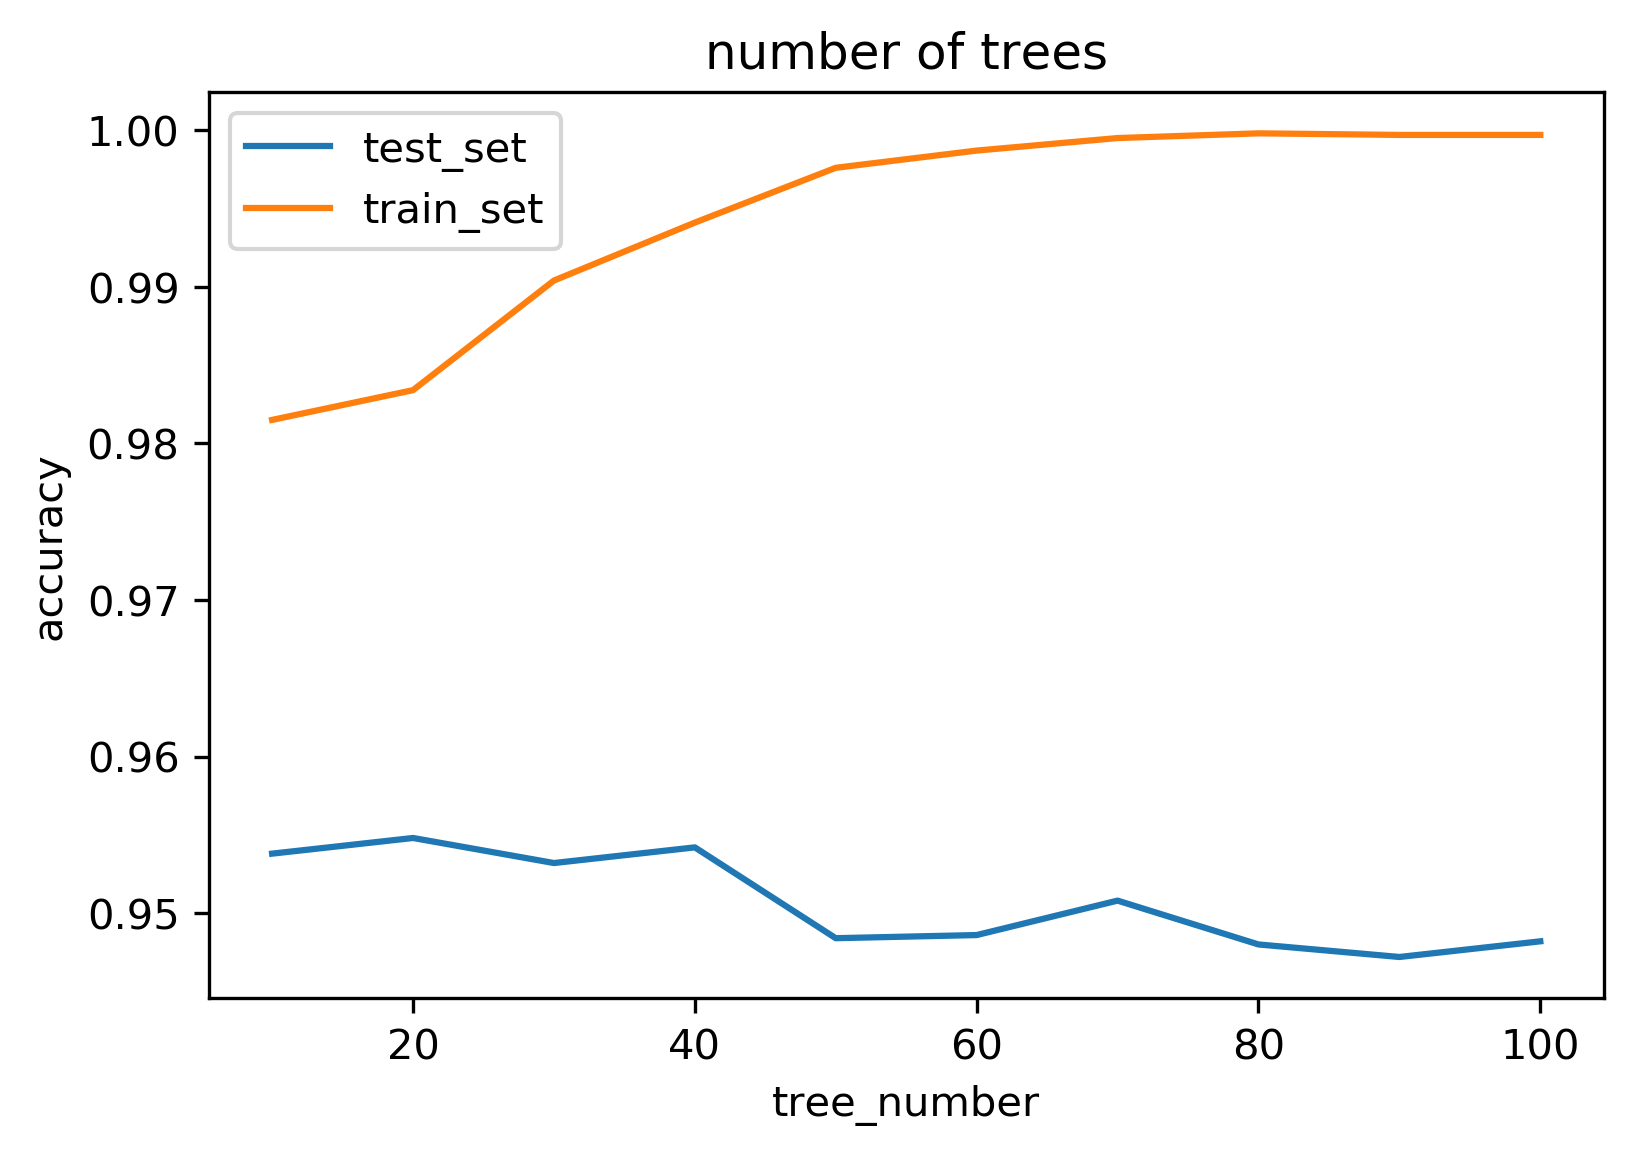

In [8]:
from likefunctions import XGBoost_number_100_random
from matplotlib import pyplot as plt
result=[]
result_train=[]
xlabel=range(10,110,10)
for i in xlabel:
    accuracy,accuracy_train=XGBoost_number_100_random(number=i)
    result.append(accuracy.mean())
    result_train.append((accuracy_train.mean()))
plt.figure(dpi=300)
plt.plot(list(xlabel),result,label='test')
plt.plot(list(xlabel),result_train,label='train')
plt.legend(['test_set','train_set'])
plt.xlabel('tree_number')
plt.ylabel('accuracy')
plt.title('number of trees')
plt.show()
    

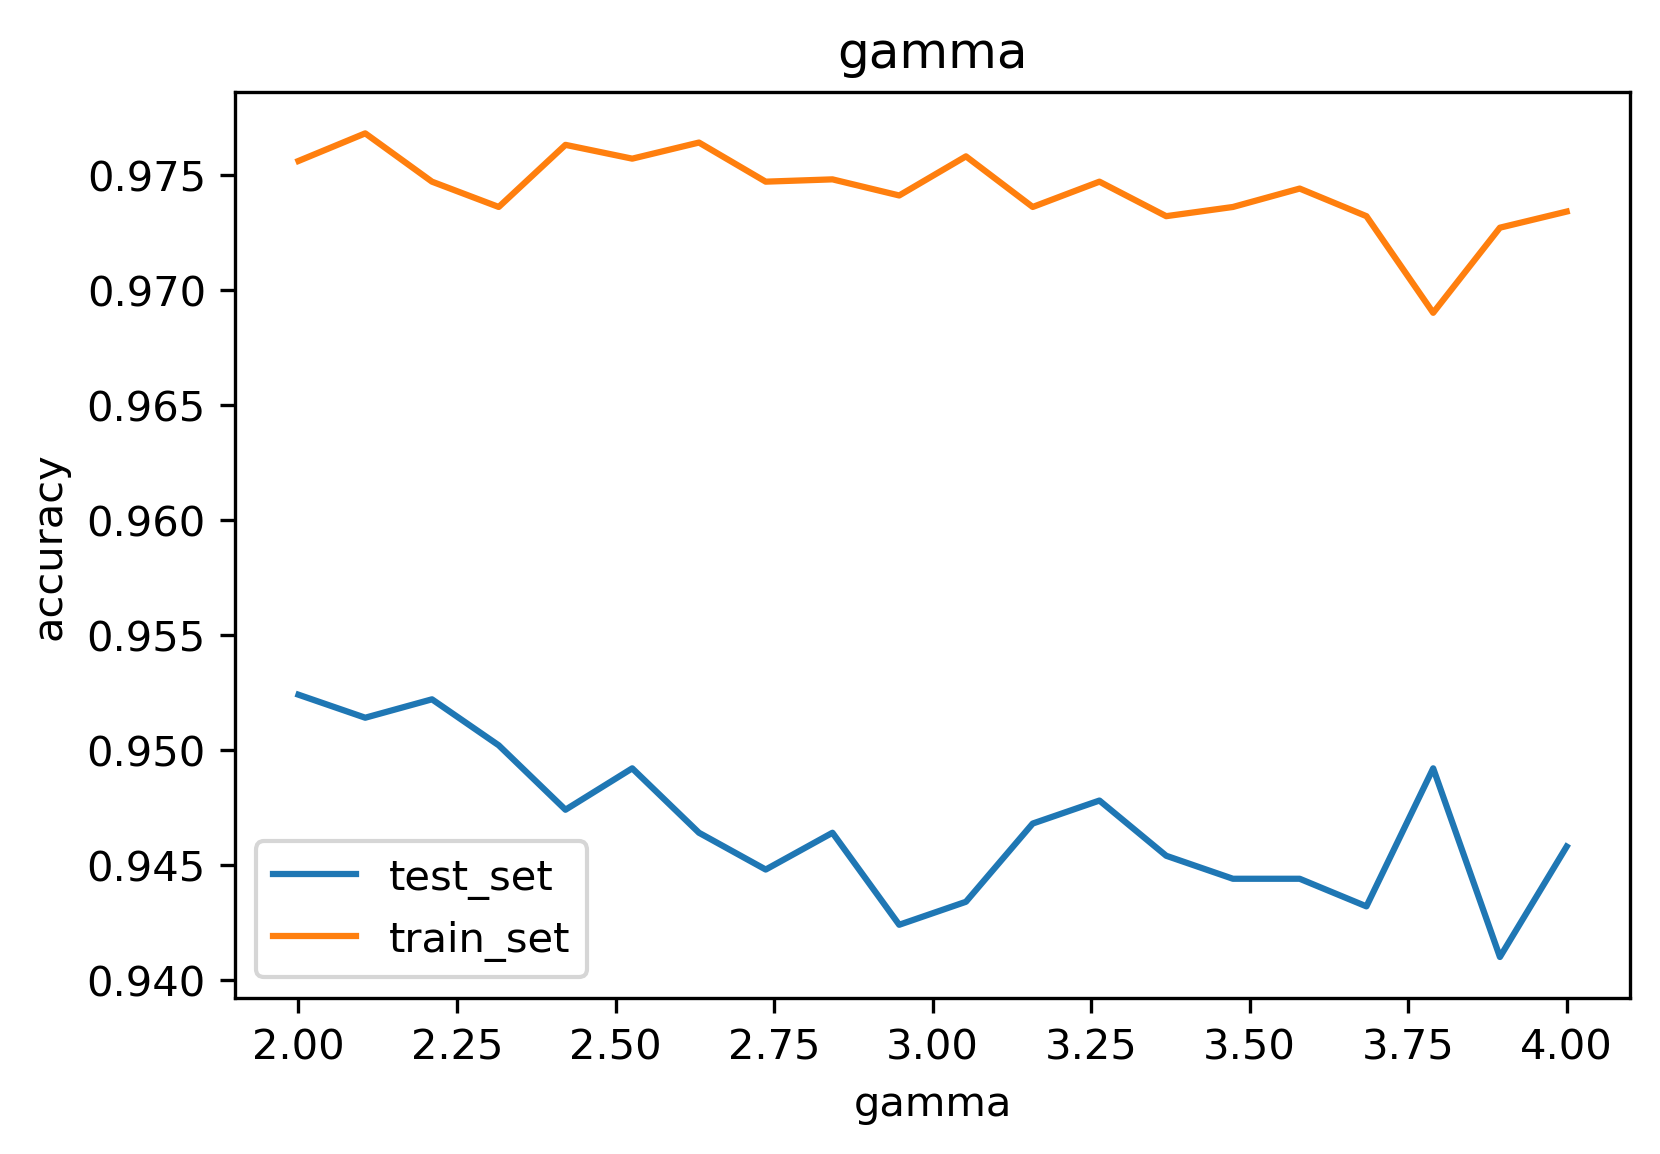

In [11]:
from likefunctions import XGBoost_gamma_100_random
import numpy as np
from matplotlib import pyplot as plt
result=[]
result_train=[]
xlabel=np.linspace(2,4,20)
for i in xlabel:
    accuracy,accuracy_train=XGBoost_gamma_100_random(gamma=i)
    result.append(accuracy.mean())
    result_train.append((accuracy_train.mean()))
plt.figure(dpi=300)
plt.plot(list(xlabel),result,label='test')
plt.plot(list(xlabel),result_train,label='train')
plt.legend(['test_set','train_set'])
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.title('gamma')
plt.show()
    

In [10]:
from likefunctions import XGBoost_learning_time_100_random
import numpy as np
from matplotlib import pyplot as plt
result=[]
result_train=[]
times=[]
xlabel=np.linspace(0,1,10)
font={'family':'Times New Roman','weight':'normal','size':7}
plt.rc('font',family='Times New Roman')
for i in xlabel:
    accuracy,accuracy_train,time=XGBoost_learning_time_100_random(learning_rate=i)
    result.append(accuracy.mean())
    result_train.append((accuracy_train.mean()))
    times.append(-time)
plt.figure(dpi=300)
plt.bar(height=times,tick_label=xlabel)
# plt.legend(['test_set','train_set'])
plt.xlabel('Learning_rate')
plt.ylabel('Time consuming')
plt.title('Time consuming')
plt.show()

TypeError: bar() missing 1 required positional argument: 'x'

<Figure size 1800x1200 with 0 Axes>

In [1]:
from likefunctions import plot_area,spl_and_Std
from xgboost import XGBClassifier

x_train,x_test,y_train,y_test=spl_and_Std()
clf=XGBClassifier(n_estimators=40,gamma=1,learning_rate=0.4,max_depth=10)
clf.fit(x_train,y_train)
plot_area(x_train,x_test,y_test,lambda x:clf.predict(x))

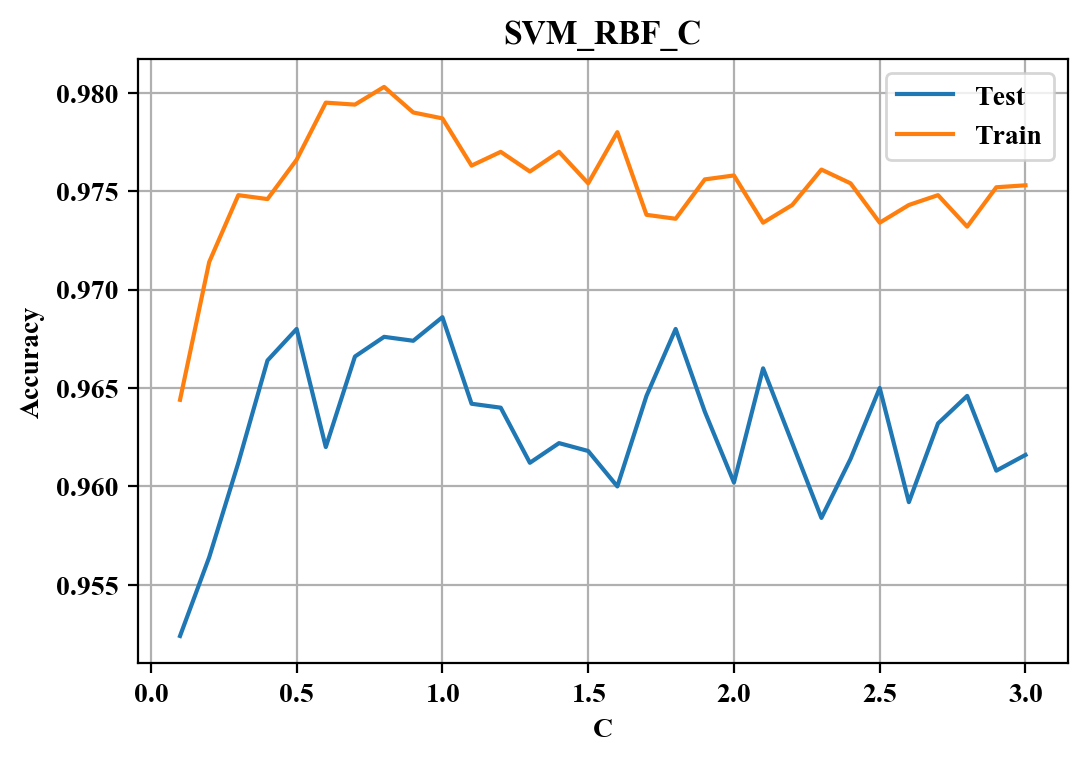

In [2]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from likefunctions import svc_C_random_100
import numpy as np
C=np.linspace(0.1,3,30)
result=[]
result_train=[]
for i in C:
    accuracy,accuracy_train=svc_C_random_100(C=i)
    result.append(accuracy.mean())
    result_train.append(accuracy_train.mean())
plt.rc('font',family='Times New Roman')
plt.figure(dpi=200)
plt.plot(C,result)
plt.plot(C,result_train)
plt.legend(['Test','Train'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM_RBF_C')
plt.grid(b=True)
plt.show()


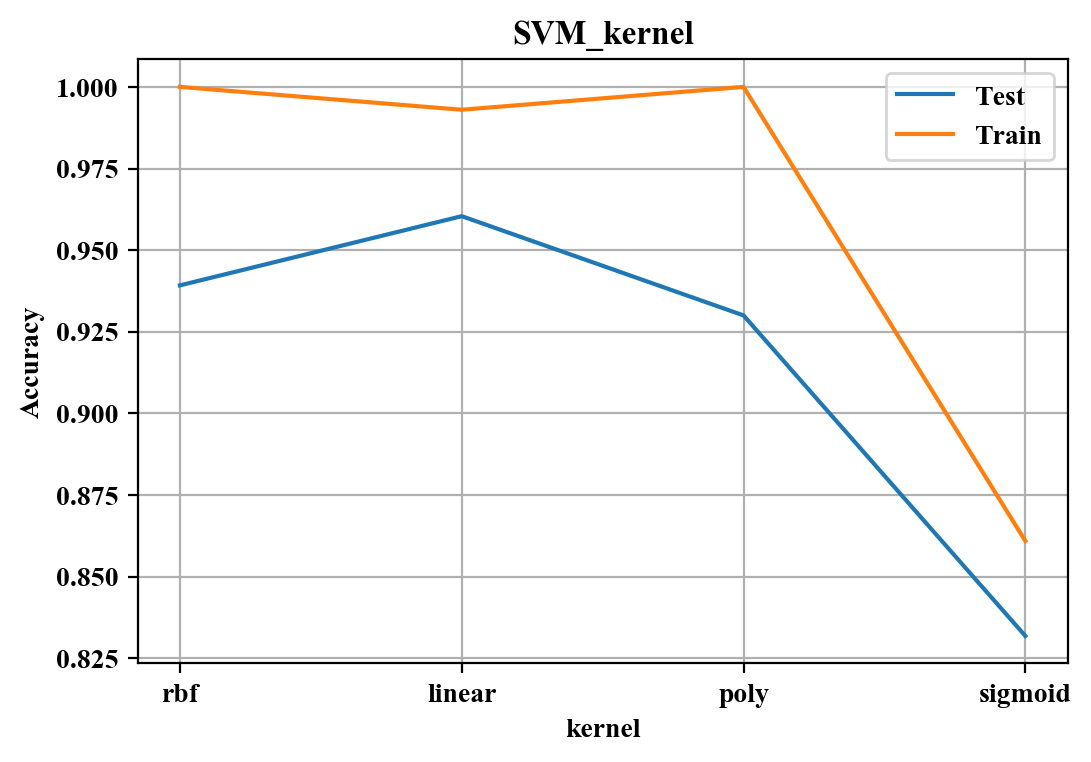

In [2]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from likefunctions import svc_kernel_random_100
import numpy as np
C=['rbf','linear','poly','sigmoid']
result=[]
result_train=[]
for i in C:
    accuracy,accuracy_train=svc_kernel_random_100(kernel=i)
    result.append(accuracy.mean())
    result_train.append(accuracy_train.mean())
plt.rc('font',family='Times New Roman')
plt.figure(dpi=200)
plt.plot(C,result)
plt.plot(C,result_train)
plt.legend(['Test','Train'])
plt.xlabel('kernel')
plt.ylabel('Accuracy')
plt.title('SVM_kernel')
plt.grid(b=True)
plt.show()


C:\Users\LIKE\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\LIKE\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\LIKE\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\LIKE\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\LIKE\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

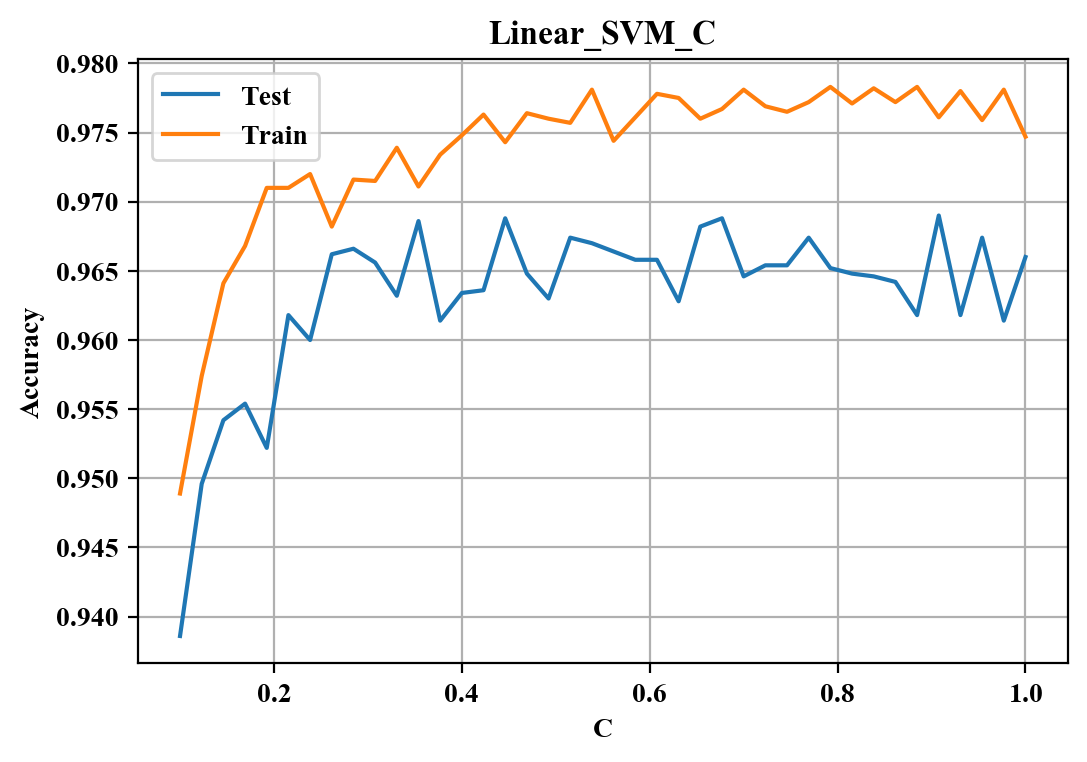

In [5]:
from matplotlib import pyplot as plt
from likefunctions import svc_linear_random_100
import numpy as np
C=np.linspace(0.1,1,40)
result=[]
result_train=[]
for i in C:
    accuracy,accuracy_train=svc_linear_random_100(C=i)
    result.append(accuracy.mean())
    result_train.append(accuracy_train.mean())
plt.rc('font',family='Times New Roman')
plt.figure(dpi=200)
plt.plot(C,result)
plt.plot(C,result_train)
plt.legend(['Test','Train'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Linear_SVM_C')
plt.grid(b=True)
plt.show()

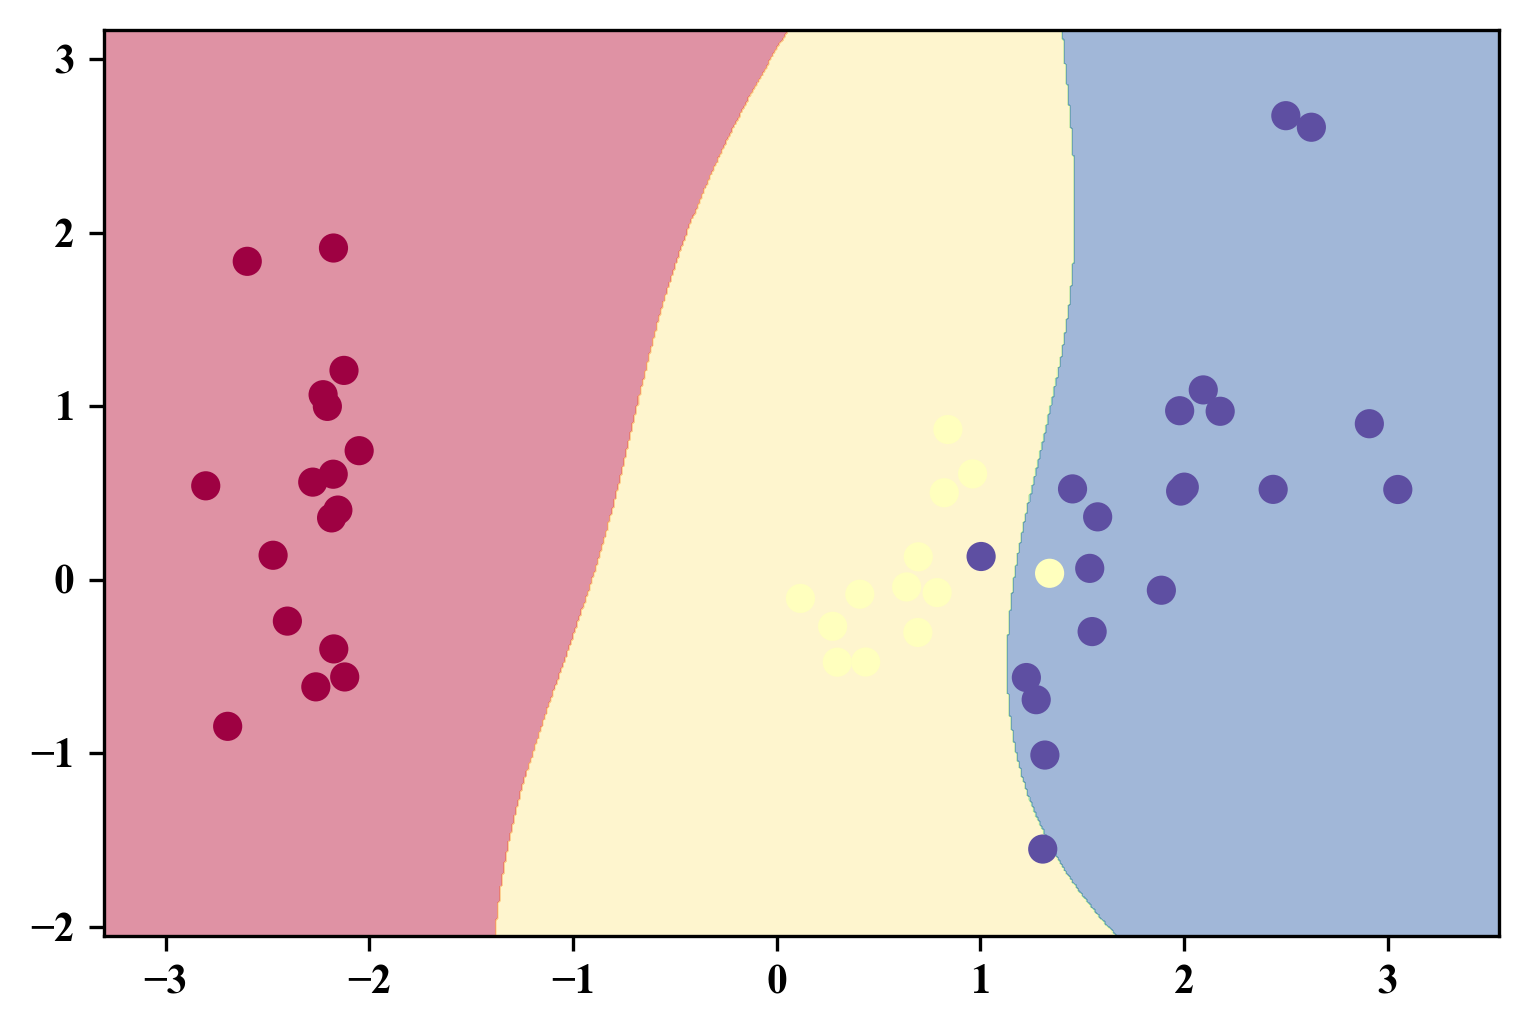

In [6]:
from likefunctions import plot_area,spl_and_Std
from sklearn.svm import SVC
from matplotlib import pyplot as plt
x_train,x_test,y_train,y_test=spl_and_Std()
clf=SVC(kernel='rbf',C=1)
clf.fit(x_train,y_train)
plot_area(x_train,x_test,y_test,lambda x:clf.predict(x))

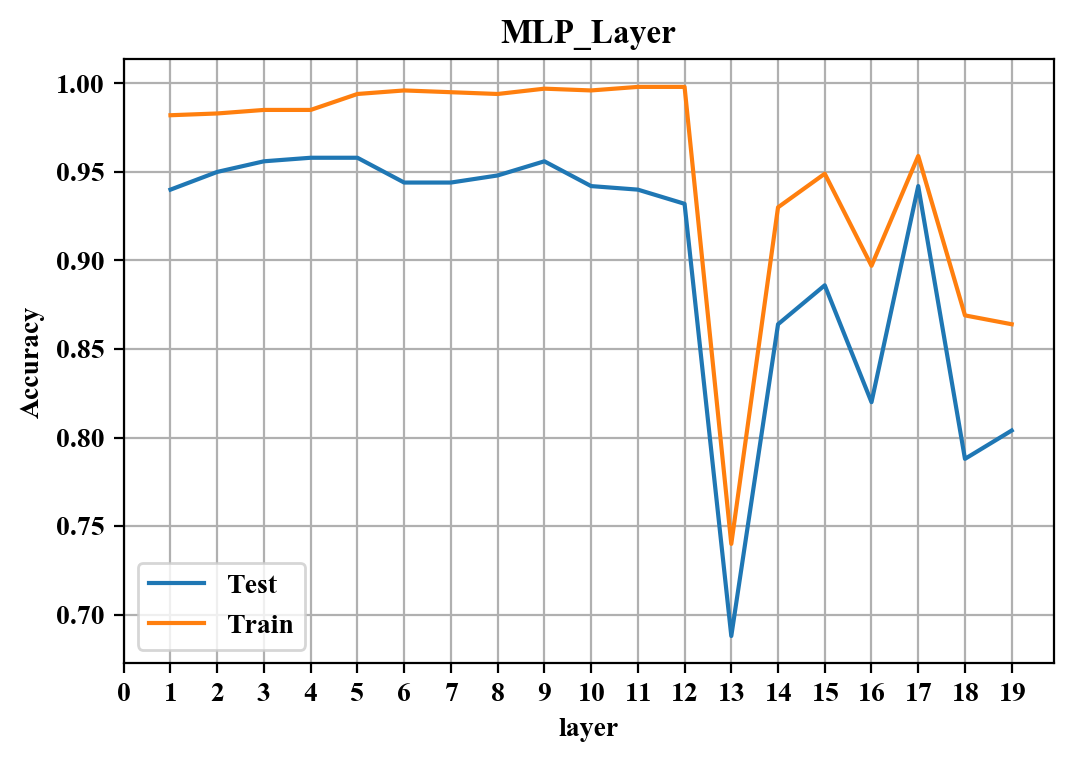

In [7]:
from matplotlib import pyplot as plt
from likefunctions import mlp_layer_random_100
import numpy as np
C=[i for i in range(1,20,1)]
xticks=range(20)
result=[]
result_train=[]
for i in C:
    accuracy,accuracy_train=mlp_layer_random_100(L=i)
    result.append(accuracy.mean())
    result_train.append(accuracy_train.mean())
plt.rc('font',family='Times New Roman')
plt.figure(dpi=200)
plt.plot(C,result)
plt.plot(C,result_train)
plt.legend(['Test','Train'])
plt.xlabel('layer')
plt.ylabel('Accuracy')
plt.title('MLP_Layer')
plt.xticks(xticks)
plt.grid(b=True)
plt.show()

Text(0.5, 1.0, 'Classes')

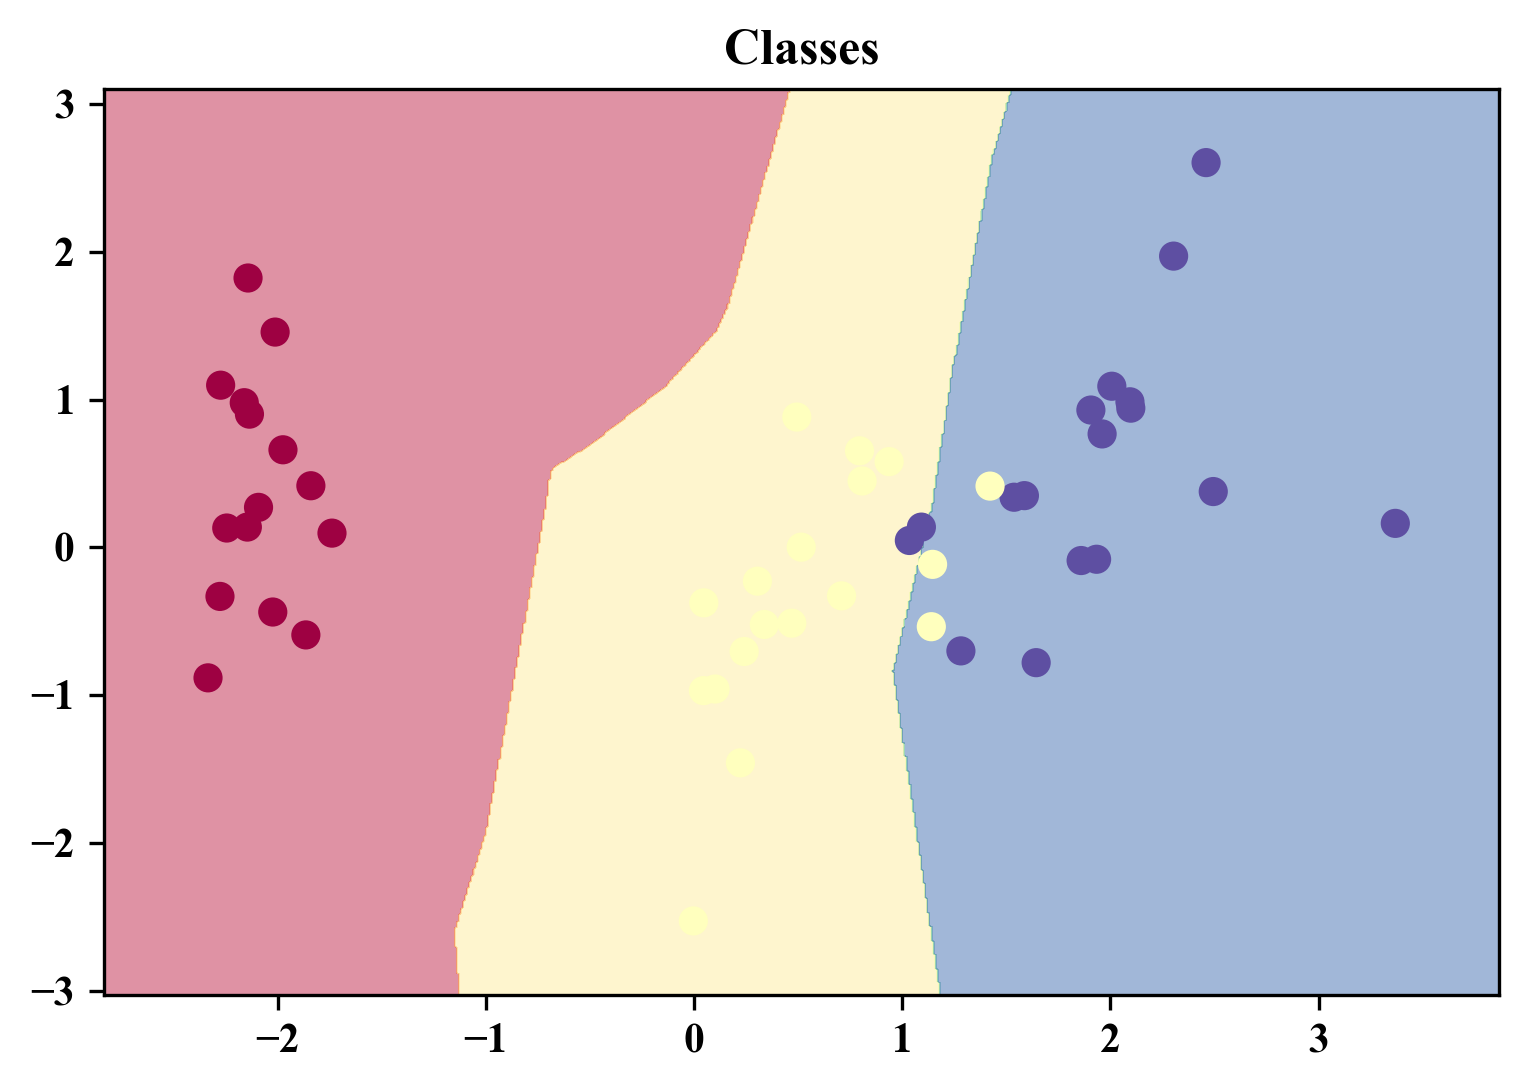

In [11]:
from likefunctions import plot_area,spl_and_Std
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
x_train,x_test,y_train,y_test=spl_and_Std()
layer=[int(6*1.2**i) for i in range(4)]
clf=MLPClassifier(hidden_layer_sizes=layer,max_iter=10000)
clf.fit(x_train,y_train)
plot_area(x_train,x_test,y_test,lambda x:clf.predict(x))
plt.title('Classes')

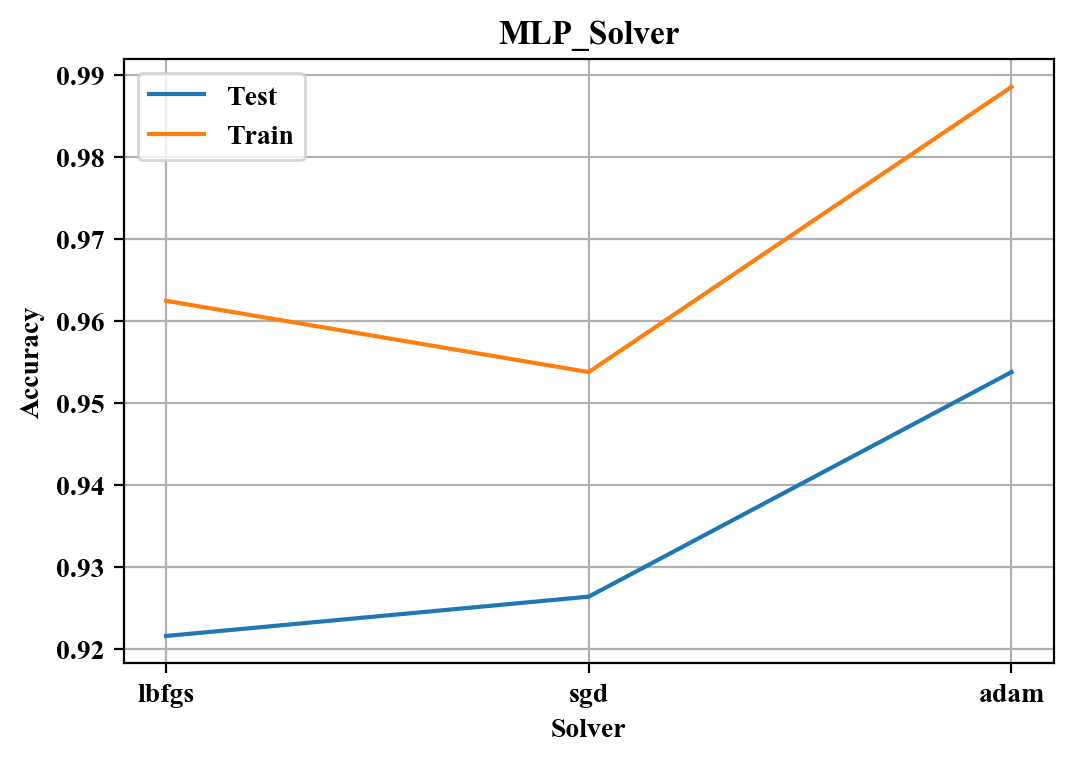

In [2]:
from matplotlib import pyplot as plt
from likefunctions import mlp_solver_random_100
import numpy as np
C=['lbfgs','sgd','adam']
result=[]
result_train=[]
for i in C:
    accuracy,accuracy_train=mlp_solver_random_100(solver=i)
    result.append(accuracy.mean())
    result_train.append(accuracy_train.mean())
plt.rc('font',family='Times New Roman')
plt.figure(dpi=200)
plt.plot(C,result)
plt.plot(C,result_train)
plt.legend(['Test','Train'])
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('MLP_Solver')
plt.grid(b=True)
plt.show()

In [ ]:
from matplotlib import pyplot as plt
from likefunctions import mlp_solver_time_random_100
import numpy as np
C=['lbfgs','sgd','adam']
time=[]
for i in C:
    time.append(mlp_solver_time_random_100(solver=i))
plt.rc('font',family='Times New Roman')
plt.figure(dpi=200)
plt.bar(C,time)
plt.legend(['Test','Train'])
plt.xlabel('Solver')
plt.ylabel('Time')
plt.title('MLP_Solver')
plt.grid(b=True)
plt.show()
